In [60]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


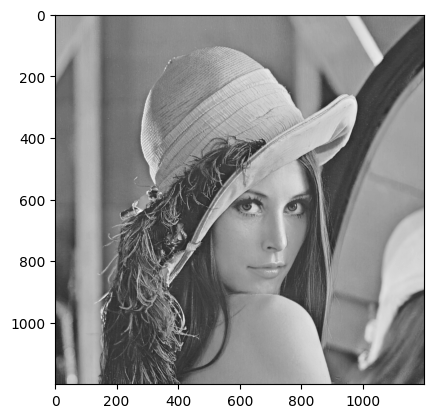

In [61]:
image = cv.imread('../imgs/lenna.png', cv.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='grey')


In [62]:
def generate_noise_uniform(img: cv.typing.MatLike, low: int, high: int) -> cv.typing.MatLike:
    noise_texture = np.zeros(img.shape)
    cv.randu(dst=noise_texture, low=low, high=high)
    return np.clip(img + noise_texture, 0, 255).astype('uint8')


def generate_noise_gauss(img: cv.typing.MatLike, mean: float, stddev: float) -> cv.typing.MatLike:
    noise_texture = np.zeros(img.shape)
    cv.randn(dst=noise_texture, mean=mean, stddev=stddev)
    return np.clip(img + noise_texture, 0, 255).astype('uint8')


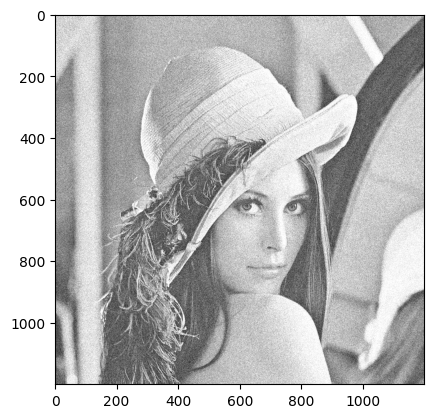

In [63]:
uniform_noised_image = generate_noise_uniform(image, 0, 100)
plt.imshow(uniform_noised_image, cmap='grey')

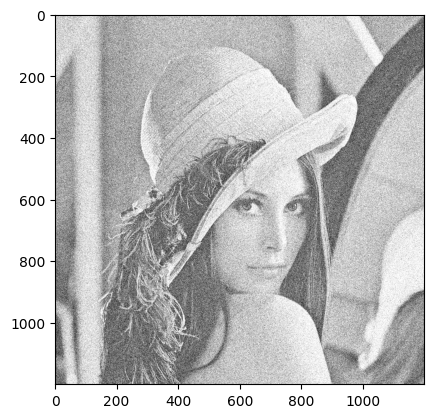

In [64]:
gauss_noised_image = generate_noise_gauss(image, stddev=50, mean=50)
plt.imshow(gauss_noised_image, cmap='grey')

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\622310595.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


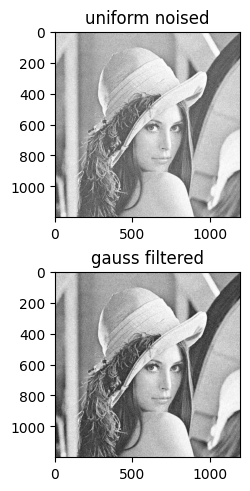

In [65]:
fig, axs = plt.subplots(2, constrained_layout=True)

gauss_uniform_img = cv.GaussianBlur(src=uniform_noised_image, ksize=(3, 3), sigmaX=3.0, sigmaY=4.0)

axs[0].set_title('uniform noised')
axs[0].imshow(uniform_noised_image, cmap='grey')

axs[1].set_title('gauss filtered')
axs[1].imshow(gauss_uniform_img, cmap='grey')
fig.show()

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\3095128792.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


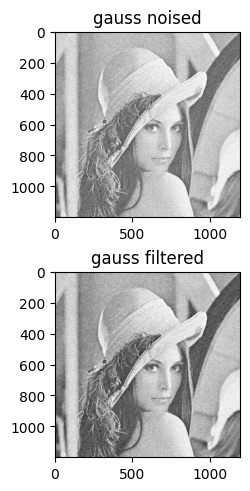

In [66]:
fig, axs = plt.subplots(2, constrained_layout=True)
gauss_gauss_img = cv.GaussianBlur(src=gauss_noised_image, ksize=(3, 3), sigmaX=3.0, sigmaY=4.0)

axs[0].set_title('gauss noised')
axs[0].imshow(gauss_noised_image, cmap='grey')

axs[1].set_title('gauss filtered')
axs[1].imshow(gauss_gauss_img, cmap='grey')

fig.show()

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\322474156.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


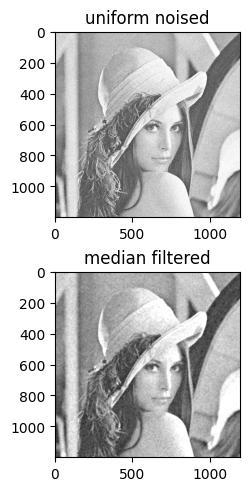

In [67]:
fig, axs = plt.subplots(2, constrained_layout=True)

median_gauss_img = cv.medianBlur(src=gauss_noised_image, ksize=9)

axs[0].set_title('uniform noised')
axs[0].imshow(uniform_noised_image, cmap='grey')

axs[1].set_title('median filtered')
axs[1].imshow(median_gauss_img, cmap='grey')

fig.show()

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\1200704219.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


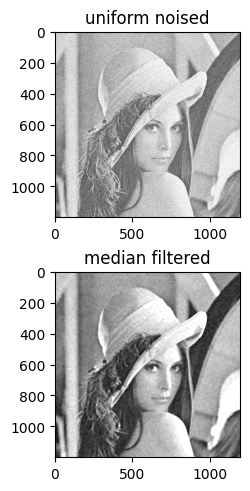

In [68]:
fig, axs = plt.subplots(2, constrained_layout=True)

median_uniform_img = cv.medianBlur(src=uniform_noised_image, ksize=9)

axs[0].set_title('uniform noised')
axs[0].imshow(gauss_noised_image, cmap='grey')

axs[1].set_title('median filtered')
axs[1].imshow(median_uniform_img, cmap='grey')

fig.show()

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\205868472.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


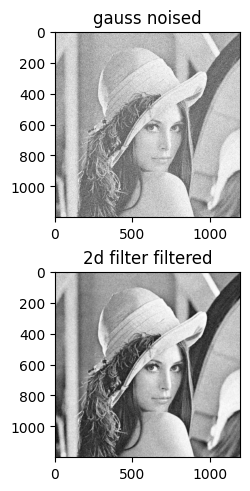

In [69]:
fig, axs = plt.subplots(2, constrained_layout=True)
kernel1 = np.ones((5, 5), np.float32) / 30

conv_uniform_img = cv.filter2D(src=uniform_noised_image, ddepth=cv.CV_8U, kernel=kernel1)

axs[0].set_title('gauss noised')
axs[0].imshow(gauss_noised_image, cmap='grey')

axs[1].set_title('2d filter filtered')
axs[1].imshow(conv_uniform_img, cmap='grey')

fig.show()

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\3008757621.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\azari\AppData\Local\Temp\ipykernel_54412\3008757621.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


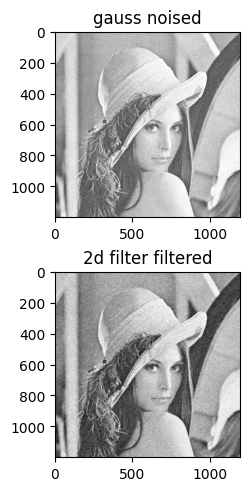

In [70]:
fig.show()
fig, axs = plt.subplots(2, constrained_layout=True)
kernel1 = np.ones((5, 5), np.float32) / 30

conv_gauss_img = cv.filter2D(src=gauss_noised_image, ddepth=cv.CV_8U, kernel=kernel1)

axs[0].set_title('gauss noised')
axs[0].imshow(uniform_noised_image, cmap='grey')

axs[1].set_title('2d filter filtered')
axs[1].imshow(conv_gauss_img, cmap='grey')

fig.show()

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\3603825557.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\azari\AppData\Local\Temp\ipykernel_54412\3603825557.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


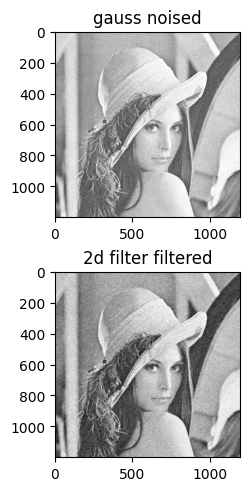

In [71]:
fig, axs = plt.subplots(2, constrained_layout=True)
kernel1 = np.ones((5, 5), np.float32) / 30

median_img = cv.filter2D(src=gauss_noised_image, ddepth=cv.CV_8U, kernel=kernel1)

axs[0].set_title('gauss noised')
axs[0].imshow(uniform_noised_image, cmap='grey')

axs[1].set_title('2d filter filtered')
axs[1].imshow(median_img, cmap='grey')

fig.show()

In [76]:
apply_blur = lambda img: cv.blur(img, ksize=(3, 3))
apply_median_filter = lambda img: cv.medianBlur(img, ksize=9)
apply_2d_filter = lambda img: cv.filter2D(img, kernel=np.ones((5, 5), np.float32) / 30, ddepth=cv.CV_8U)

In [77]:
operations = [
    ('blur', apply_blur),
    ('median', apply_median_filter),
    ('2d_filter', apply_2d_filter)
]



In [93]:
from typing import Callable


def draw_plots(orig_image: cv.typing.MatLike,
               noised_image: cv.typing.MatLike,
               noise_type: str,
               opers: list[tuple[str, Callable[[cv.typing.MatLike], cv.typing.MatLike]]],
               ) -> None:
    fig, axs = plt.subplots(nrows=1, ncols=5, constrained_layout=True)
    
    fig.set_size_inches(15, 15)
    fig.suptitle(f'{noise_type} transformations')

    axs[0].set_title('orig')
    axs[0].imshow(orig_image, cmap='grey')

    axs[1].set_title(f'noised {noise_type}')
    axs[1].imshow(noised_image, cmap='grey')

    for i, (oper_type, oper) in enumerate(opers, start=2):
        axs[i].set_title(f'{oper_type}')
        axs[i].imshow(oper(noised_image), cmap='grey')

    fig.show()


images = [
    ('gauss_noised', gauss_noised_image),
    ('uniform_noised', uniform_noised_image),
]


C:\Users\azari\AppData\Local\Temp\ipykernel_54412\1826626034.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


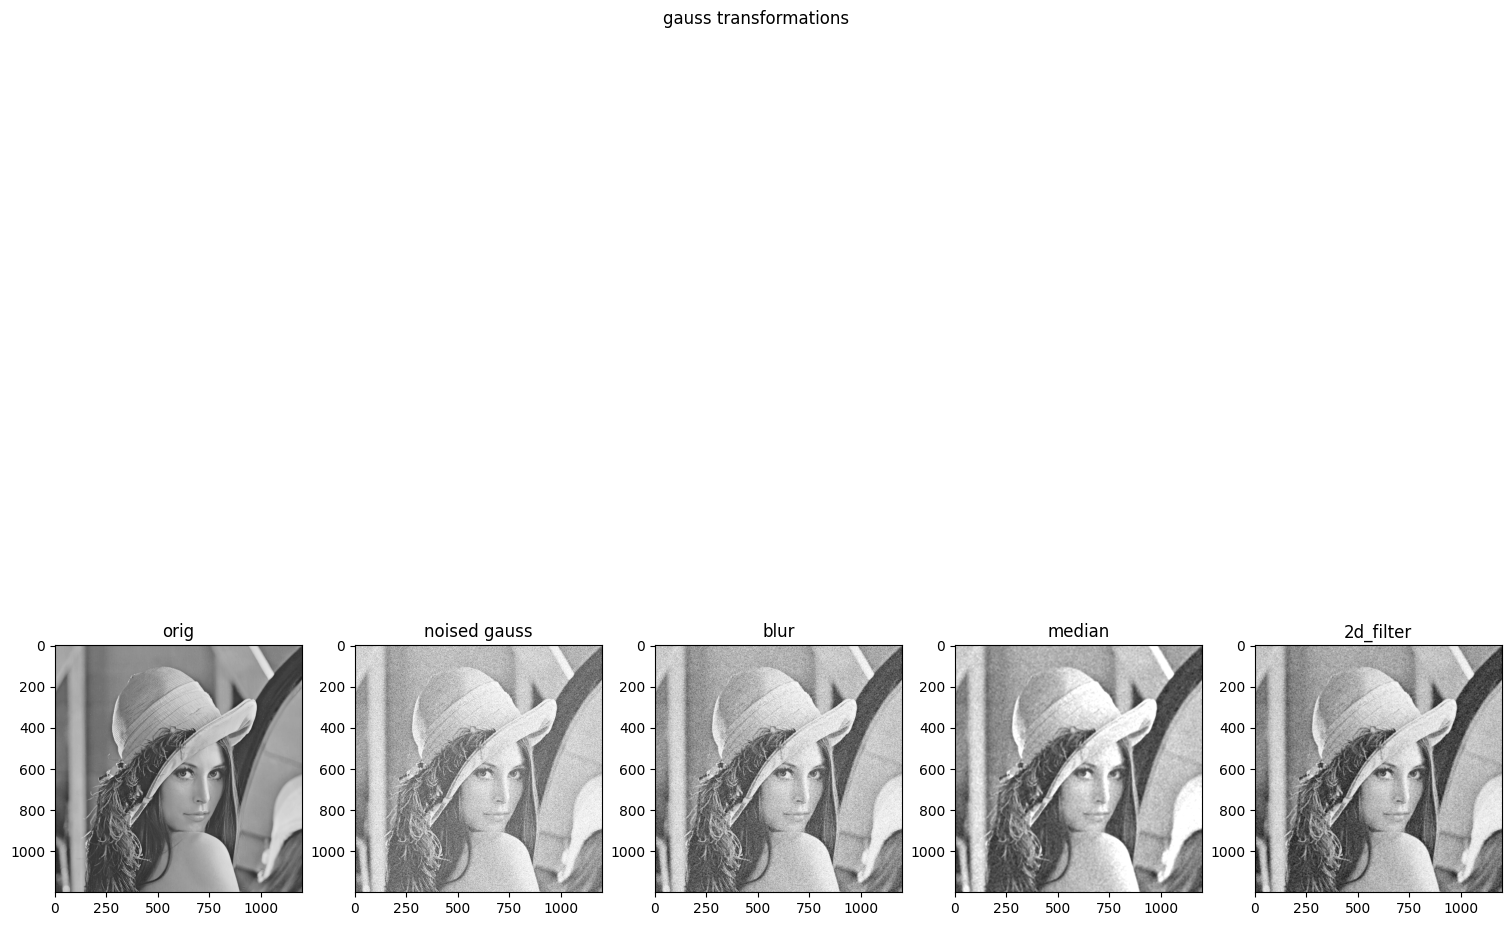

In [94]:
draw_plots(orig_image=image, 
           noised_image=gauss_noised_image, 
           noise_type='gauss', 
           opers=operations)

C:\Users\azari\AppData\Local\Temp\ipykernel_54412\1826626034.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


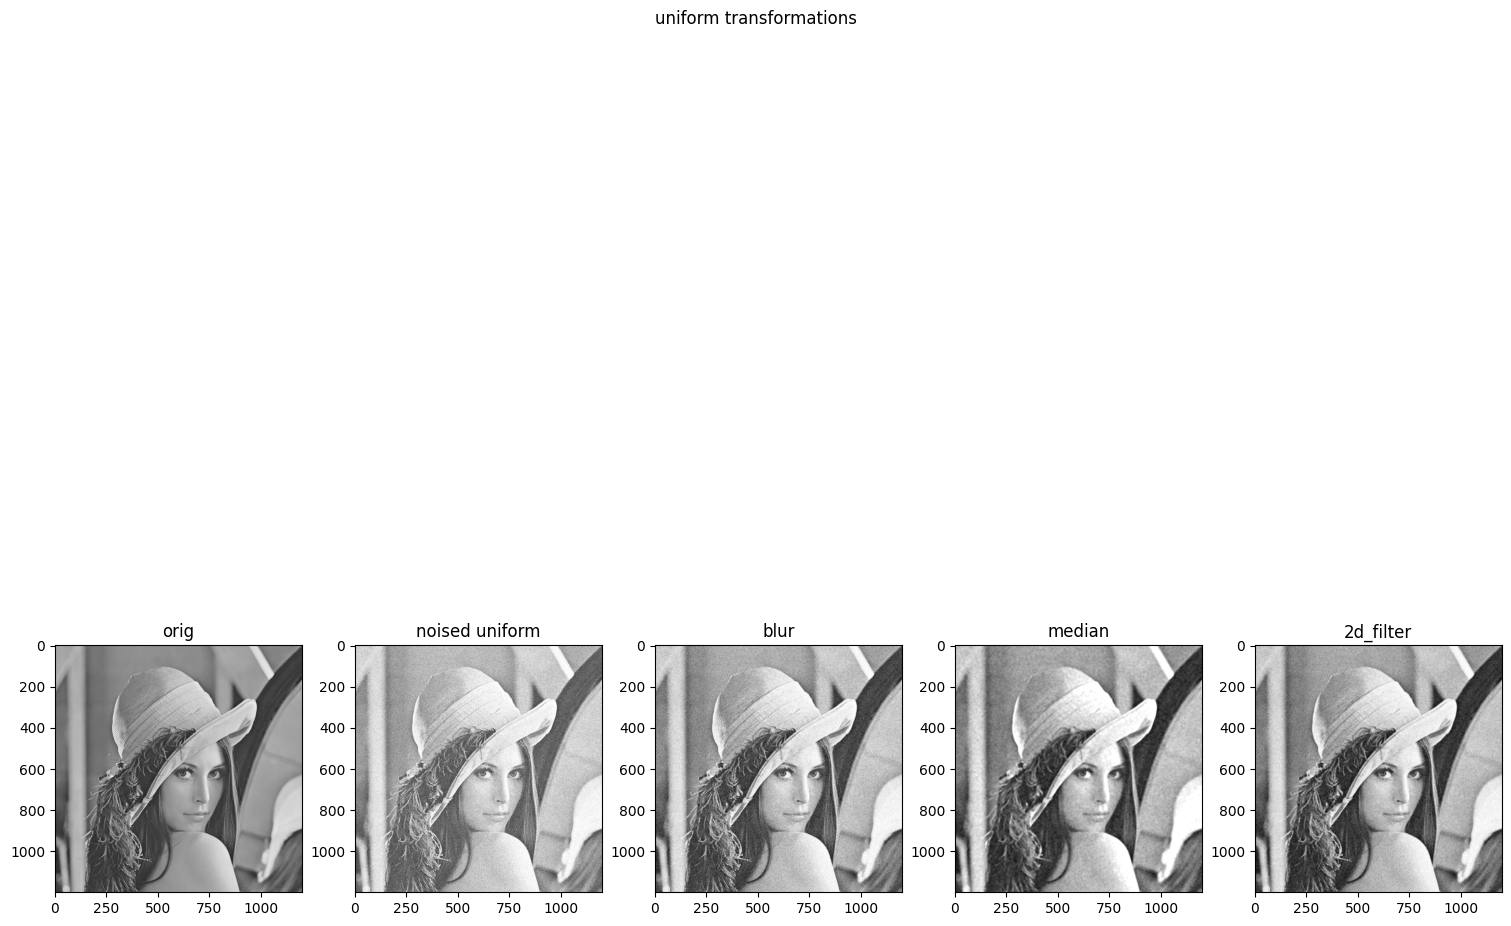

In [95]:
draw_plots(orig_image=image, 
           noised_image=uniform_noised_image, 
           noise_type='uniform', 
           opers=operations)